In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

# Exercises
Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

#### Bonus:

- Compute the mean(logerror) by zipcode and the overall mean(logerror). 
- Write a loop that will run a t-test between the overall mean and the mean for each zip code. 
- We want to identify the zip codes where the error is significantly higher or lower than the expected error.




In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Los_Angeles


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,69729.0,1.300685e+07,2.124188e+06,1.071186e+07,1.154398e+07,1.258974e+07,1.425668e+07,1.629608e+08
bathroomcnt,69729.0,2.254206e+00,9.154803e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
bedroomcnt,69729.0,3.008978e+00,9.953164e-01,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
calculatedfinishedsquarefeet,69729.0,1.733360e+03,8.741181e+02,3.600000e+02,1.164000e+03,1.507000e+03,2.048000e+03,1.203900e+04
fips,69729.0,6.049319e+03,2.083894e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,69729.0,3.400259e+07,2.680716e+05,3.333953e+07,3.380388e+07,3.401301e+07,3.417438e+07,3.481877e+07
longitude,69729.0,-1.181935e+08,3.609254e+05,-1.194753e+08,-1.184092e+08,-1.181630e+08,-1.179134e+08,-1.175723e+08
lotsizesquarefeet,69729.0,2.763931e+04,1.190511e+05,2.360000e+02,6.000000e+03,7.313000e+03,1.067000e+04,6.971010e+06
rawcensustractandblock,69729.0,6.049617e+07,2.068339e+05,6.037101e+07,6.037312e+07,6.037621e+07,6.059052e+07,6.111009e+07
regionidcity,69729.0,3.349075e+04,4.655635e+04,3.491000e+03,1.244700e+04,2.521800e+04,4.545700e+04,3.965560e+05


In [31]:
df = wrangle.remove_outliers(df, 1.5, ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt'])

Number of observations removed: 17462


In [32]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
5,17143294,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,6.111005e+07,51239.0,...,6.0,1982.0,198640.0,331064.0,2016.0,132424.0,3508.10,-0.020526,2017-01-01,Ventura
7,12069064,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,4214.0,6.037302e+07,45457.0,...,0.0,1922.0,18890.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Los_Angeles


In [83]:
df.shape

(52267, 22)

In [33]:
def split_data(df):

    ''' this function will take your raw data frame, clean it and split it'''
    
    # split the data
    train_validate, test = train_test_split(df, test_size=.2, random_state=177)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=177)
    
    # show the split
    print(f'Dataframe has been split: ')
    print(f'Train: {train.shape}')
    print(f'Validate: {validate.shape}')
    print(f'Test: {test.shape}')
    
    # return train validate and test
    return train, validate, test 

In [34]:
train, validate, test = split_data(df)

Dataframe has been split: 
Train: (29269, 22)
Validate: (12544, 22)
Test: (10454, 22)


In [35]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
7861,12818292,1.0,3.0,1047.0,6037.0,34019797.0,-117980659.0,9413.0,6.037408e+07,45602.0,...,0.0,1955.0,32463.0,52339.0,2016.0,19876.0,923.74,0.285127,2017-02-03,Los_Angeles
11435,17063201,3.0,4.0,2165.0,6111.0,34401758.0,-118928443.0,6558.0,6.111000e+07,18098.0,...,8.0,1994.0,190692.0,317817.0,2016.0,127125.0,3869.66,0.030607,2017-02-22,Ventura
42816,10726637,3.0,4.0,2569.0,6037.0,34177450.0,-118656893.0,11060.0,6.037137e+07,12447.0,...,0.0,1967.0,223650.0,629340.0,2016.0,405690.0,7747.48,-0.045974,2017-06-02,Los_Angeles
58200,12117853,1.0,3.0,1602.0,6037.0,34159643.0,-118101520.0,9047.0,6.037463e+07,47019.0,...,0.0,1930.0,155000.0,773000.0,2016.0,618000.0,9011.81,0.055423,2017-07-18,Los_Angeles
35332,12159792,1.0,2.0,861.0,6037.0,34190941.0,-118158744.0,10769.0,6.037461e+07,30187.0,...,0.0,1923.0,22343.0,31842.0,2016.0,9499.0,715.65,-0.011426,2017-05-11,Los_Angeles


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29269 entries, 7861 to 26513
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29269 non-null  int64  
 1   bathroomcnt                   29269 non-null  float64
 2   bedroomcnt                    29269 non-null  float64
 3   calculatedfinishedsquarefeet  29269 non-null  float64
 4   fips                          29269 non-null  float64
 5   latitude                      29269 non-null  float64
 6   longitude                     29269 non-null  float64
 7   lotsizesquarefeet             29269 non-null  float64
 8   rawcensustractandblock        29269 non-null  float64
 9   regionidcity                  29269 non-null  float64
 10  regionidcounty                29269 non-null  float64
 11  regionidzip                   29269 non-null  float64
 12  roomcnt                       29269 non-null  float64
 13

In [37]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,29269.0,1.321334e+07,2.390015e+06,1.071188e+07,1.172833e+07,1.280666e+07,1.438485e+07,1.629608e+08
bathroomcnt,29269.0,2.065069e+00,7.055062e-01,1.000000e+00,2.000000e+00,2.000000e+00,2.500000e+00,4.500000e+00
bedroomcnt,29269.0,2.998736e+00,8.940939e-01,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
calculatedfinishedsquarefeet,29269.0,1.572025e+03,5.613292e+02,3.600000e+02,1.160000e+03,1.466000e+03,1.890000e+03,3.374000e+03
fips,29269.0,6.051036e+03,2.156517e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,29269.0,3.398752e+07,2.719465e+05,3.334062e+07,3.378967e+07,3.396647e+07,3.417322e+07,3.472023e+07
longitude,29269.0,-1.181673e+08,3.696450e+05,-1.193717e+08,-1.183710e+08,-1.181190e+08,-1.178948e+08,-1.175724e+08
lotsizesquarefeet,29269.0,7.011673e+03,2.623118e+03,2.360000e+02,5.609000e+03,7.000000e+03,7.629000e+03,1.767200e+04
rawcensustractandblock,29269.0,6.051315e+07,2.140620e+05,6.037101e+07,6.037404e+07,6.037703e+07,6.059063e+07,6.111009e+07
regionidcity,29269.0,3.447797e+04,4.959231e+04,3.491000e+03,1.244700e+04,2.521800e+04,4.411600e+04,3.965560e+05


In [76]:
for col in train.columns:
    print(col)
    print(train[col].value_counts())

parcelid
14092694    2
14671963    2
14012730    2
10871677    2
12535098    2
           ..
10908225    1
10967432    1
13867454    1
14150384    1
12350044    1
Name: parcelid, Length: 29232, dtype: int64
bathroomcnt
2.0    13145
1.0     5974
3.0     5286
2.5     3426
1.5      760
4.0      441
3.5      215
4.5       22
Name: bathroomcnt, dtype: int64
bedroomcnt
3.0    13208
2.0     7236
4.0     6648
5.0     1055
1.0      989
6.0      113
7.0       20
Name: bedroomcnt, dtype: int64
calculatedfinishedsquarefeet
1120.0    88
1200.0    74
1080.0    62
1240.0    57
1260.0    57
          ..
2829.0     1
3084.0     1
537.0      1
2895.0     1
3083.0     1
Name: calculatedfinishedsquarefeet, Length: 2700, dtype: int64
fips
6037.0    16946
6059.0     9636
6111.0     2687
Name: fips, dtype: int64
latitude
33665651.0    19
33667397.0    14
33883516.0    12
34150000.0    12
33603000.0    12
              ..
33841983.0     1
33867083.0     1
33758048.0     1
34088040.0     1
33945017.0     1
Nam

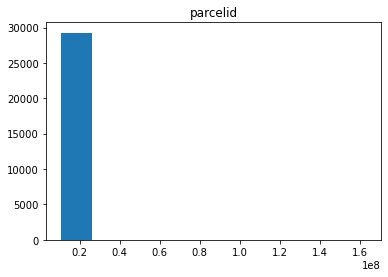

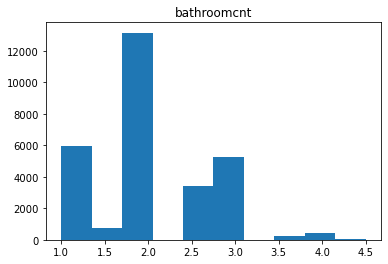

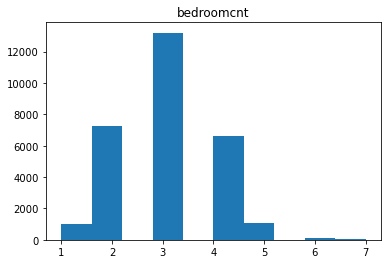

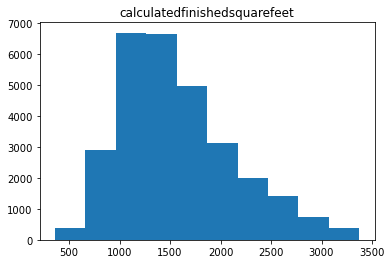

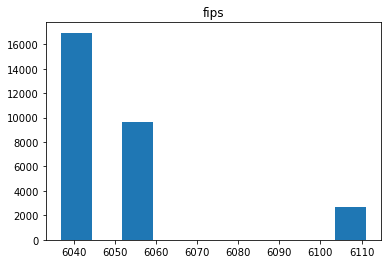

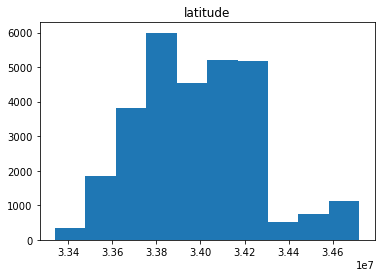

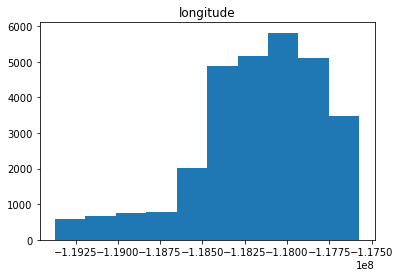

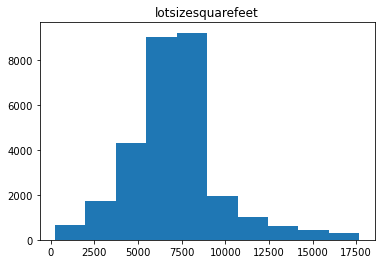

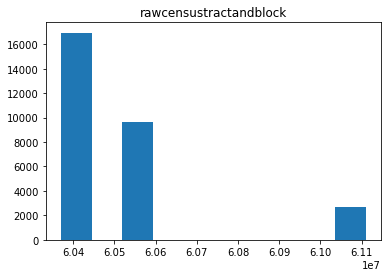

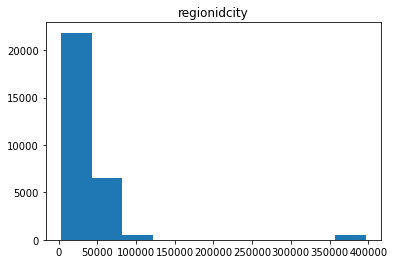

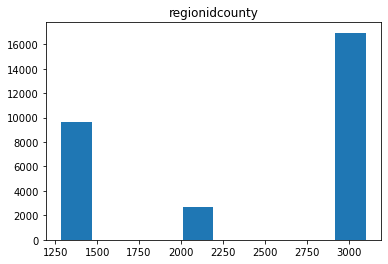

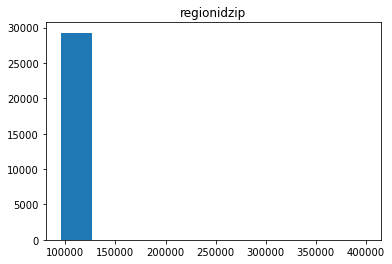

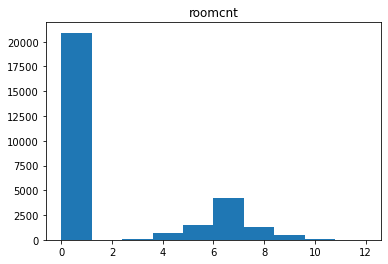

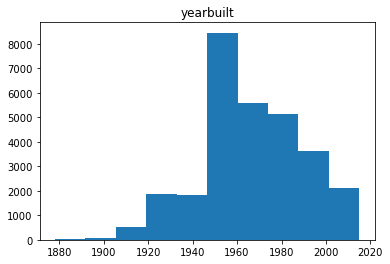

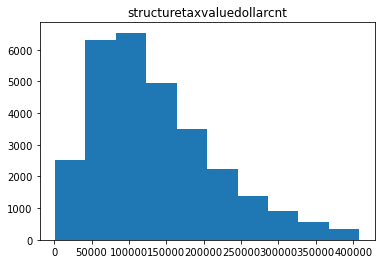

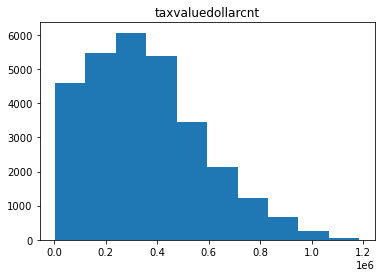

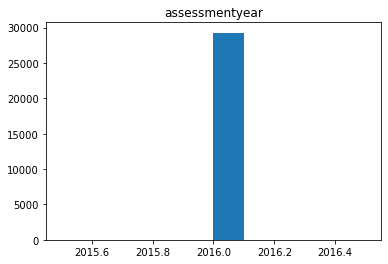

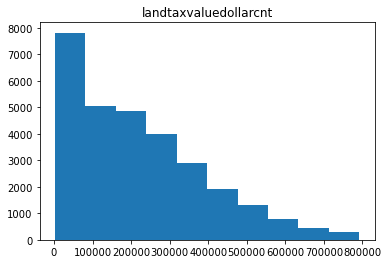

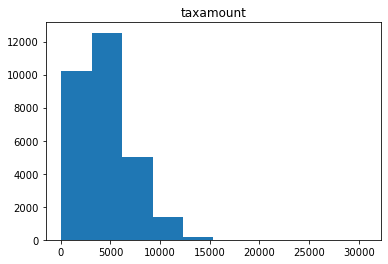

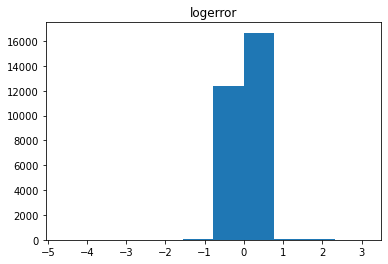

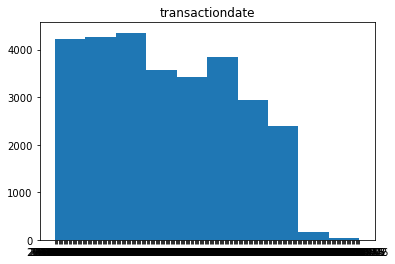

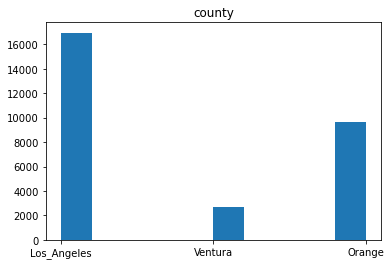

In [40]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

Relationship between Square footage and Logerror?


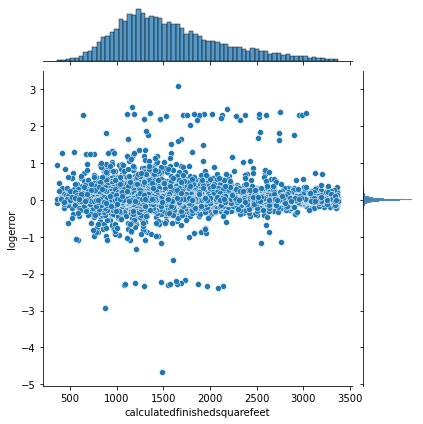

In [41]:
print('Relationship between Square footage and Logerror?')
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train)
plt.xlabel('Calculated Finished Square Feet')
plt.ylabel('Logerror')
plt.show()

Relationship between Latitude and Logerror?


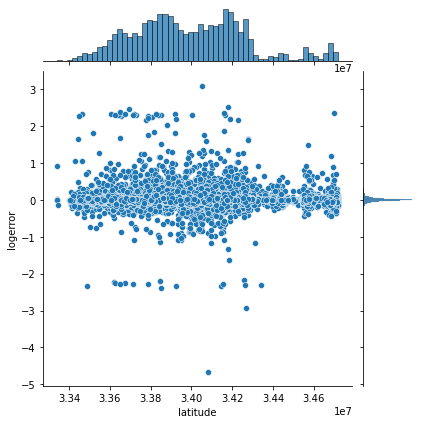

In [42]:
print('Relationship between Latitude and Logerror?')
sns.jointplot(x='latitude', y='logerror', data=train)
plt.xlabel('Latitude')
plt.ylabel('Logerror')
plt.show()

Relationship between Longitude and Logerror?


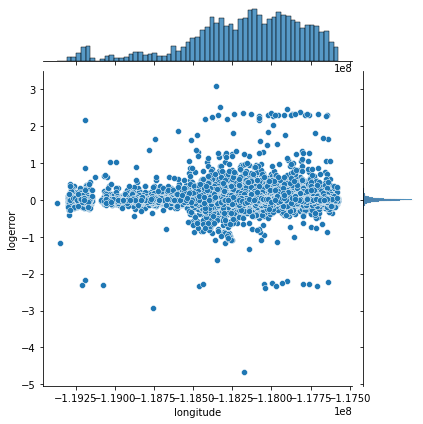

In [43]:
print('Relationship between Longitude and Logerror?')
sns.jointplot(x='longitude', y='logerror', data=train)
plt.xlabel('Longitude')
plt.ylabel('Logerror')
plt.show()

Relationship between Raw Census and Logerror?


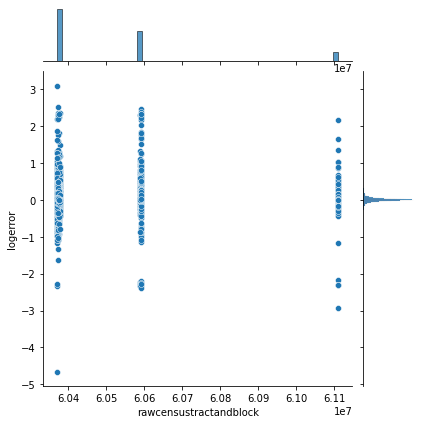

In [44]:
print('Relationship between Raw Census and Logerror?')
sns.jointplot(x='rawcensustractandblock', y='logerror', data=train)
plt.xlabel('Raw Census Count')
plt.ylabel('Logerror')
plt.show()

Relationship between Bathroom count and Logerror?


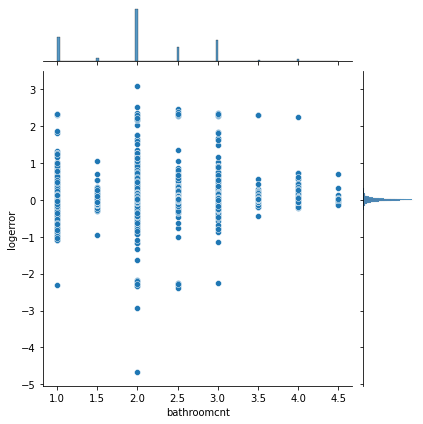

In [45]:
print('Relationship between Bathroom count and Logerror?')
sns.jointplot(x='bathroomcnt', y='logerror', data=train)
plt.xlabel('Bathroom Count')
plt.ylabel('Logerror')
plt.show()

Relationship between Bedroom count and Logerror?


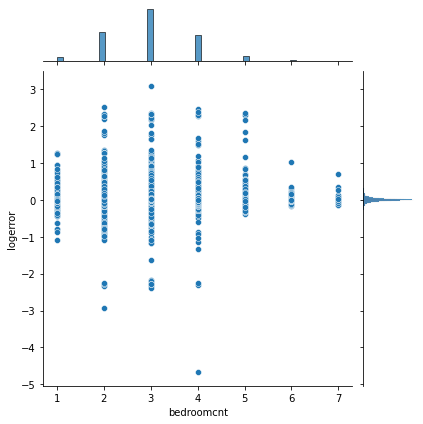

In [46]:
print('Relationship between Bedroom count and Logerror?')
sns.jointplot(x='bedroomcnt', y='logerror', data=train)
plt.xlabel('Bedroom Count')
plt.ylabel('Logerror')
plt.show()

Relationship between Lot Size and Logerror?


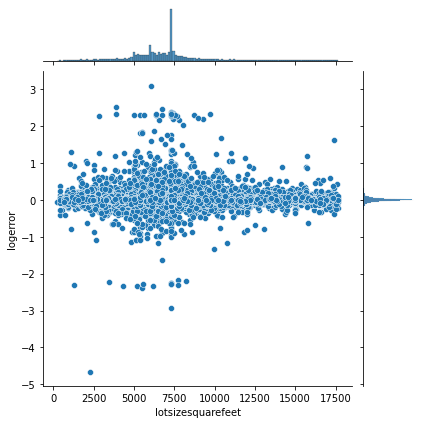

In [53]:
print('Relationship between Lot Size and Logerror?')
sns.jointplot(x='lotsizesquarefeet', y='logerror', data=train)
plt.xlabel('Lot Size')
plt.ylabel('Logerror')
plt.show()

Relationship between regionidcity and Logerror?


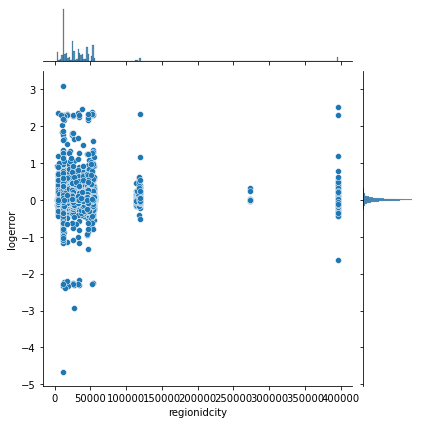

In [49]:
print('Relationship between regionidcity and Logerror?')
sns.jointplot(x='regionidcity', y='logerror', data=train)
plt.xlabel('regionidcity')
plt.ylabel('Logerror')
plt.show()

Relationship between regionidcounty and Logerror?


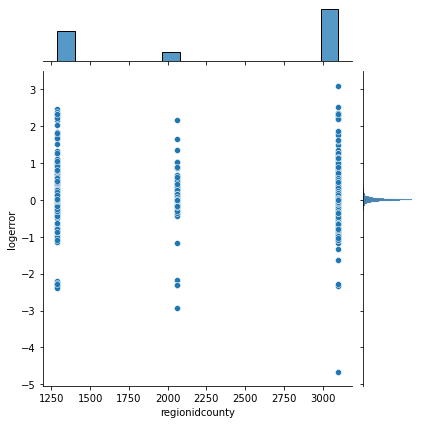

In [50]:
print('Relationship between regionidcounty and Logerror?')
sns.jointplot(x='regionidcounty', y='logerror', data=train)
plt.xlabel('regionidcounty')
plt.ylabel('Logerror')
plt.show()

Relationship between regionidzip and Logerror?


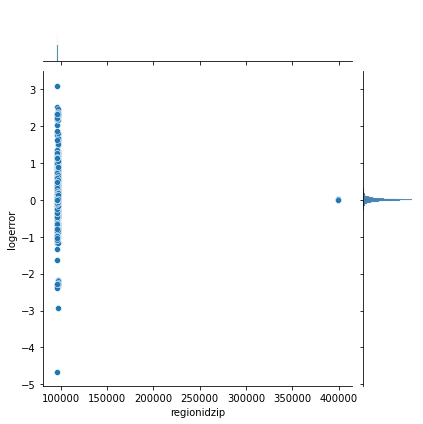

In [51]:
print('Relationship between regionidzip and Logerror?')
sns.jointplot(x='regionidzip', y='logerror', data=train)
plt.xlabel('regionidzip')
plt.ylabel('Logerror')
plt.show()

Relationship between Structure Tax Value and Logerror?


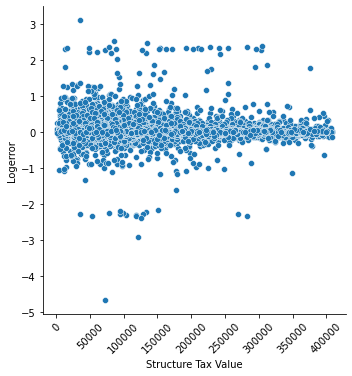

In [81]:
print('Relationship between Structure Tax Value and Logerror?')
sns.relplot(x='structuretaxvaluedollarcnt', y='logerror', data=train)
plt.xlabel('Structure Tax Value')
plt.xticks(rotation=45)
plt.ylabel('Logerror')
plt.show()

Relationship between Land Tax Value and Logerror?


AttributeError: 'JointGrid' object has no attribute 'set_xticklabels'

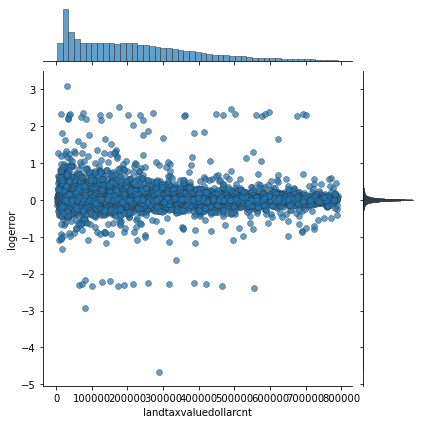

In [79]:
print('Relationship between Land Tax Value and Logerror?')
chart = sns.JointGrid(x='landtaxvaluedollarcnt', y='logerror', data=train)
chart.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
